# Nearest Neighbor 

In [1]:
# Train & test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_train=pd.read_csv(r'C:\Users\ppulivarthi\AV_Hackthons\HR_Analytics\train_LZdllcl.csv')

In [2]:
print("******** No.of Row's and Column's in Dataframe********* \n ",df_train.shape,
     "\n \n **************Columns in Dataframe*********** \n ",df_train.columns,
     "\n \n **************Top 5 Row's in Dataframe *********** \n ",df_train.head())


******** No.of Row's and Column's in Dataframe********* 
  (54808, 14) 
 
 **************Columns in Dataframe*********** 
  Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object') 
 
 **************Top 5 Row's in Dataframe *********** 
     employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing             

In [3]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df_train.drop(['employee_id'],axis=1,inplace=True)


In [5]:
df_train=df_train[:6000]

In [6]:
df_train.isna().sum()

department                0
region                    0
education               298
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    453
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
is_promoted               0
dtype: int64

In [8]:
df_train1=df_train.fillna(method='ffill')

In [9]:
df_train1.department.unique()
# labend

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [10]:
#Creating Dummy variables for Categorical variables
df_train2=pd.get_dummies(df_train1, columns = ['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'previous_year_rating',
       'length_of_service'],drop_first=True)

In [11]:
X = df_train2.loc[:, df_train2.columns != 'is_promoted']
y = df_train2.loc[:, df_train2.columns == 'is_promoted']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(n_neighbors=3)

In [19]:
model = KNeighborsClassifier(n_neighbors=3,p=1)
model.fit(X_train, y_train)

C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(n_neighbors=3, p=1)

In [20]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
y_pred = model.predict(X_test)
# y_pred = model.predict_proba(X_test)
print("*********Accuracy_Score******\n ",accuracy_score(y_pred,y_test))
print("\n  Classification_Report****** \n",classification_report(y_pred,y_test))
print("\n **********Confusion Matrix********** \n",confusion_matrix(y_pred,y_test))
print("\n**********f1 Score********* \n",f1_score(y_pred,y_test))

*********Accuracy_Score******
  0.9035353535353535

  Classification_Report****** 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1912
           1       0.18      0.50      0.26        68

    accuracy                           0.90      1980
   macro avg       0.58      0.71      0.61      1980
weighted avg       0.95      0.90      0.92      1980


 **********Confusion Matrix********** 
 [[1755  157]
 [  34   34]]

**********f1 Score********* 
 0.2625482625482626


In [22]:
acc_score=[]
f1_scor=[]
for i in range(1,10):
    print(i)
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_scr=accuracy_score(y_pred,y_test)
    f1_sc=f1_score(y_pred,y_test)
    acc_score.append([i,acc_scr])
    f1_scor.append([i,f1_sc])
    # y_pred = model.predict_proba(X_test)
    print("*********Accuracy_Score******\n ",accuracy_score(y_pred,y_test))
#     print("\n  Classification_Report****** \n",classification_report(y_pred,y_test))
#     print("\n **********Confusion Matrix********** \n",confusion_matrix(y_pred,y_test))
#     print("\n**********f1 Score********* \n",f1_score(y_pred,y_test))

1


C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


*********Accuracy_Score******
  0.8611111111111112
2


C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


*********Accuracy_Score******
  0.9106060606060606
3


C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


*********Accuracy_Score******
  0.9030303030303031
4


C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


*********Accuracy_Score******
  0.9141414141414141
5


C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


*********Accuracy_Score******
  0.9131313131313131
6


C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


*********Accuracy_Score******
  0.9156565656565656
7


C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


*********Accuracy_Score******
  0.9156565656565656
8


C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


*********Accuracy_Score******
  0.9156565656565656
9


C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


*********Accuracy_Score******
  0.9171717171717172


In [23]:
acc_sc=pd.DataFrame(acc_score,columns=["K","Acc"])
f1sc=pd.DataFrame(f1_scor,columns=["K","Acc"])

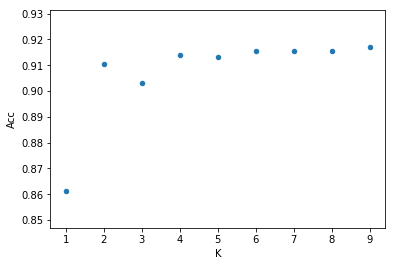

In [24]:
acc_sc.plot.scatter(x='K',y='Acc')

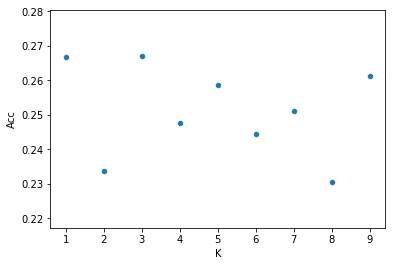

In [25]:
f1sc.plot.scatter(x='K',y='Acc')

In [17]:
model.classes_

array([0, 1], dtype=int64)

In [21]:
model.effective_metric_

'manhattan'

In [ ]:
model.effective_metric_params_

In [ ]:
model.outputs_2d_

In [27]:
from sklearn.neighbors import RadiusNeighborsClassifier

In [28]:
model = RadiusNeighborsClassifier(radius=5.0)

In [29]:
model.fit(X_train,y_train)

C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:409: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  SupervisedIntegerMixin.fit(self, X, y)


RadiusNeighborsClassifier(radius=5.0)

In [30]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
y_pred = model.predict(X_test)
# y_pred = model.predict_proba(X_test)
print("*********Accuracy_Score******\n ",accuracy_score(y_pred,y_test))
print("\n  Classification_Report****** \n",classification_report(y_pred,y_test))
print("\n **********Confusion Matrix********** \n",confusion_matrix(y_pred,y_test))
print("\n**********f1 Score********* \n",f1_score(y_pred,y_test))

*********Accuracy_Score******
  0.9146464646464646

  Classification_Report****** 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      1956
           1       0.12      0.96      0.21        24

    accuracy                           0.91      1980
   macro avg       0.56      0.94      0.58      1980
weighted avg       0.99      0.91      0.95      1980


 **********Confusion Matrix********** 
 [[1788  168]
 [   1   23]]

**********f1 Score********* 
 0.21395348837209302


In [ ]:
----


1. 30

feate:20
buil:
prediction:
    
50>  
feate:20

    
    Retraining.
    feature:40
        build
        new model
        
        
    
    